In [8]:
# import relevant libraries

import nltk
#nltk.download('punkt')
import os
import random
#!pip install -U textblob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter1d

In [20]:
stop_words = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";", "~",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either", "haue", "vnto", "thy", "did", "was", "were", "have", "thee", 
             "your", "thou", "unto", "hath", "had", "went", "has", "his", "an","does", "who", "most", "up","on",
             "would", "those", "much", "said", "ther", "iij", "ij", "upon", "unto", "kl", "nd"]

def o4_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(30,100%%, %d%%)" % np.random.randint(49,51))

def generateWordClouds(txt, color_func):
    h8_wordcloud = WordCloud(background_color="white").generate(txt)
    h8_wordcloud.recolor(color_func = color_func)
    plt.imshow(h8_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [21]:
directory = '../vtexts/'
crowns = ['henry', 'edward', 'mary', 'elizabeth', 'james','charles']
file_list = []
crown_dict ={}

henrytxt = ""
edwardtxt = ""
marytxt = ""
elizabethtxt = ""
jamestxt = ""
charlestxt = ""

for crown in crowns:
    crown_dict[crown] = []
    for file in os.listdir(directory+crown):
        if 'gz' not in file:
            file_list.append(file)
            print(file)
            fil = open(os.path.join(directory+crown, file)) #encoding="utf8", errors='ignore'
            raw_text = fil.read()
            crown_dict[crown].append(raw_text)
            fil.close()

people_pilgrammageofgrace_1536.txt
PPLConservativeOpinion_1535.txt
RoyalProclamation_HenryVIII_1520.txt
LutherAgainstHenryVIII_1522.txt
MercerWill_1522.txt
PPLLetterBedyll_1535.txt
ChurchNewEnglishLitany_1544.txt
crown_henryviii_excerptdefense_1521.txt
ChurchCardinaltoHenryVIIIDivorce_1527.txt
PPLDeanofYorktoCromwell_1535.txt
PPLFriarWardtoCromwell_1535.txt
crown_prefacedoctrine_henryviii_1543.txt
people_anneboleynfinalspeech_1536.txt
CrownAgainstNunBarton_1534.txt
people_lastletterofthomasmore_1535.txt
crown_henryviii_speechtoparliament_1545.txt
TheActOfSupremacy_HenryVIII_1534.txt
KingEdwardWesternRebels_Edward_1549.txt
EdwardVItoBishops_Edward_1551.txt
EdwardVItoBishops2_Edward_1551.txt
AnActOfUniformity_Edward_1549.txt
EdwardVItoBonner_Edward_1549.txt
DukeofNorthumberland_1552.txt
PPLApprenticetoCromwell_1552.txt
PPLCranmertoPrivyCouncil_1552.txt
DiaryofHenryMachyn_155053.txt
SacramentAct_EdwardVI_1547.txt
EdwardVICatechism_1553.txt
ArundelltoEarl_1554.txt
RepealofEdwardVI_MaryI_15

In [22]:
for crown in crown_dict:
    for text in crown_dict[crown]:
        if crown == "henry":
            for word in text:
                word = word.lower()
                if word not in stop_words:
                    henrytxt += word
                    henrytxt += ''
        if crown == "edward":
            for word in text:
                word = word.lower()
                if word not in stop_words:
                    edwardtxt += word
                    edwardtxt += ''
        if crown == "mary":
            for word in text:
                word = word.lower()
                if word not in stop_words:
                    marytxt += word
                    marytxt += ''
        if crown == "elizabeth":
            for word in text:
                word = word.lower()
                if word not in stop_words:
                    elizabethtxt += word
                    elizabethtxt += ''
        if crown == "james":
            for word in text:
                word = word.lower()
                if word not in stop_words:
                    jamestxt += word
                    jamestxt += ''
        if crown == "charles":
            for word in text:
                word = word.lower()
                if word not in stop_words:
                    charlestxt += word
                    charlestxt += ''

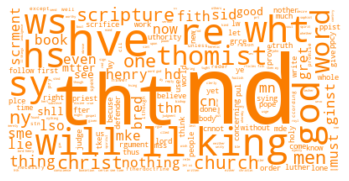

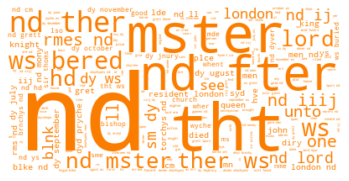

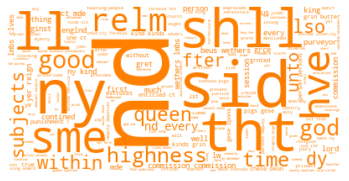

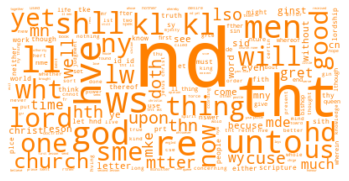

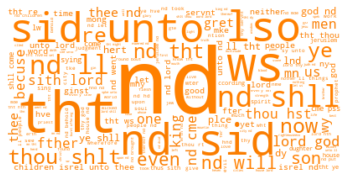

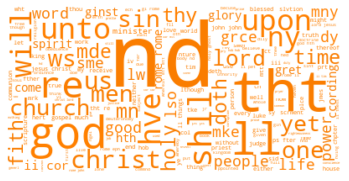

In [23]:
crown_texts = [henrytxt, edwardtxt, marytxt, elizabethtxt, jamestxt, charlestxt]

for crowntxt in crown_texts:
    generateWordClouds(crowntxt, o4_color_func)

In [19]:
print(crown_dict['henry'])

['The king was truly informed that there was a new insurrection made by the northern men, who had assembled themselves into a huge and great army of warlike men, well appointed with captains, horse, armour and artillery, to the number of 40,000 men, who had encamped themselves in Yorkshire. And these men had bound themselves to each other by their oath to be faithful and obedient to their captain.The also declared, by their proclamation solemnly made, that their insurrection should extend no further than to the maintenance and defence of the faith of Christ and the deliverance of holy church, sore decayed and oppressed, and to the furtherance also of private and public matters in the realm concerning the wealth of all the king’s poor subjects. They called this, their seditious and traitorous voyage, a holy and blessed pilgrimage; they also had certain banners in the field whereon was painted Christ hanging on the cross on one side, and a chalice with a painted cake in it on the other s